<a href="https://colab.research.google.com/github/getty15/LoanAnalysis-/blob/main/Loan_Prediction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA HANDLING AND PREPROCESSING




In [ ]:
import pandas as pd
from google.colab import files
df = pd.read_csv('/content/Loan Prediction data-1.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
num_records = df.shape[0]
num_attributes = df.shape[1]
print(f'Number of records: {num_records}')
print(f'Number of attributes: {num_attributes}')



Number of records: 614
Number of attributes: 13


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

<ipython-input-5-1edba570fa7c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [ ]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate records: {duplicates}')

Number of duplicate records: 0


In [ ]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]
print(f'Number of outliers in LoanAmount: {outliers.shape[0]}')

Number of outliers in LoanAmount: 31


In [ ]:
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [ ]:
df.columns


Index(['Loan_ID', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male', 'Married_Yes'],
      dtype='object')

In [ ]:
print (df.columns)

Index(['Loan_ID', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male_True', 'Married_Yes_True'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Check if 'LoanAmount' exists
if 'LoanAmount' in df.columns:
    scaler = StandardScaler()
    df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
else:
    print("Column 'LoanAmount' not found in DataFrame.")

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       ApplicantIncome  CoapplicantIncome    LoanAmount  Loan_Amount_Term  \
count       468.000000         468.000000  4.680000e+02        468.000000   
mean       4752.202991        1471.435726 -1.897817e-18        341.717949   
std        3866.990214        2482.636898  1.001070e+00         65.957919   
min         150.000000           0.000000 -2.524608e+00         36.000000   
25%        2764.750000           0.000000 -6.217634e-01        360.000000   
50%        3737.500000        1084.500000 -6.763842e-02        360.000000   
75%        5429.750000        2173.000000  5.335349e-01        360.000000   
max       39147.000000       33837.000000  2.723897e+00        480.000000   

       Credit_History  LoanIncomeRatio  
count      468.000000       468.000000  
mean         0.852564        -0.000054  
std          0.354919         0.000301  
min          0.000000        -0.001815  
25%          1.000000        -0.000204  
50%          1.000000        -0.000015  
75%          1.0000

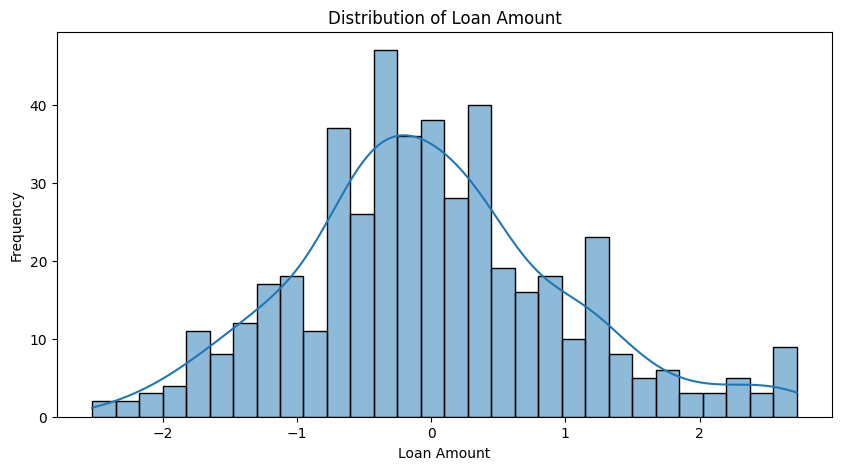

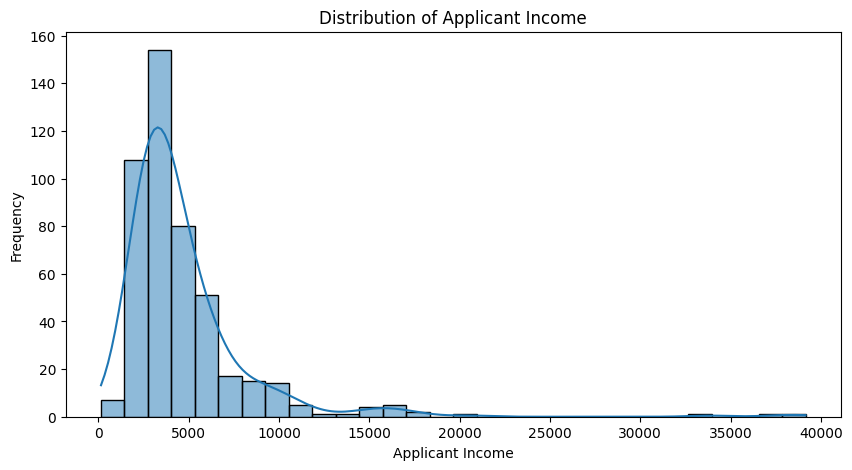

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for LoanAmount
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram for ApplicantIncome
plt.figure(figsize=(10, 5))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

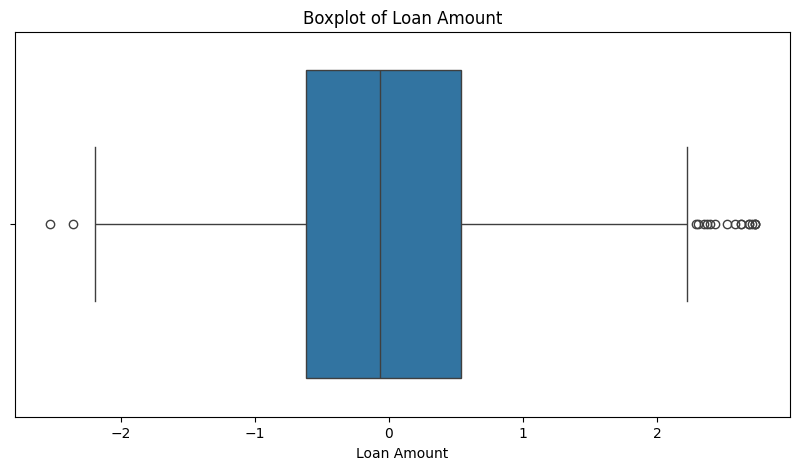

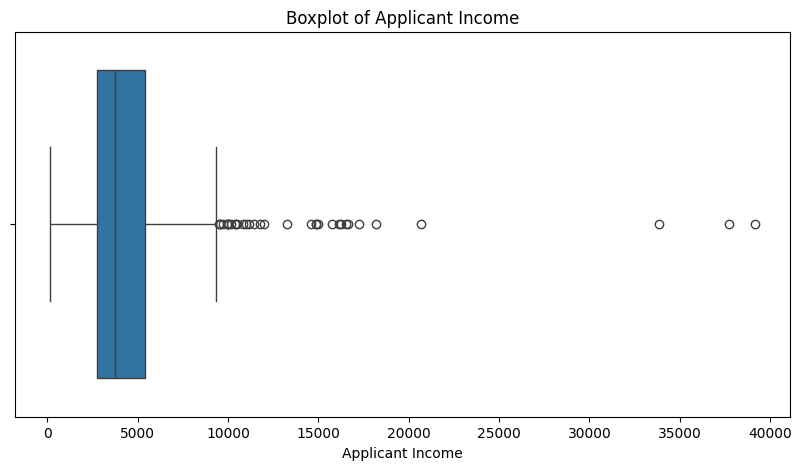

In [ ]:
# Boxplot for LoanAmount
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['LoanAmount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

# Boxplot for ApplicantIncome
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

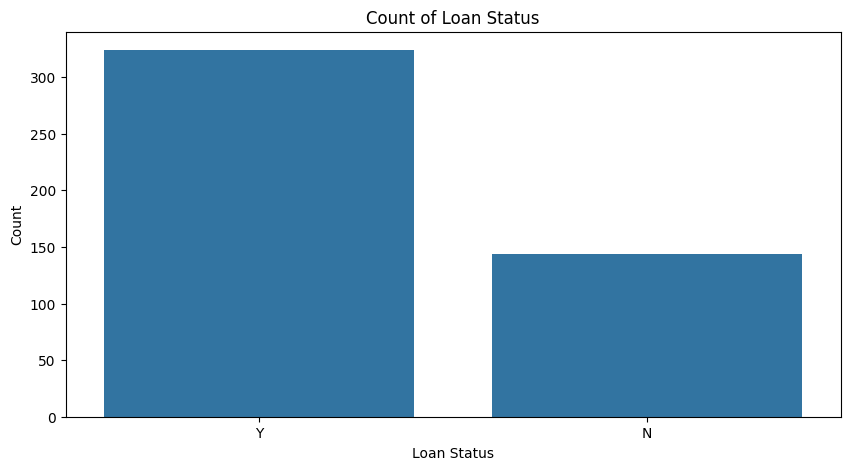

In [ ]:
# Bar chart for Loan Status
plt.figure(figsize=(10, 5))
sns.countplot(x='Loan_Status', data=df)
plt.title('Count of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

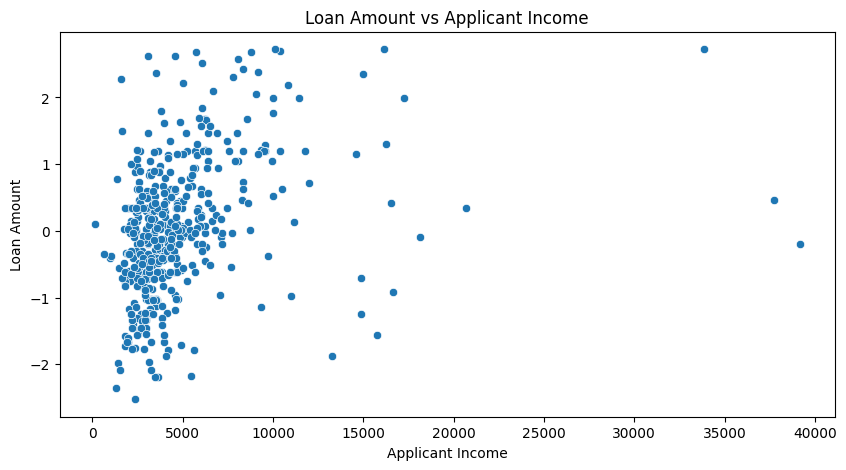

In [ ]:
# Scatter plot for LoanAmount vs ApplicantIncome
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

PROBABILITY AND STATISTICS

In [ ]:
# Mean
mean_loan_amount = df['LoanAmount'].mean()
mean_applicant_income = df['ApplicantIncome'].mean()

# Median
median_loan_amount = df['LoanAmount'].median()
median_applicant_income = df['ApplicantIncome'].median()

# Mode
mode_loan_amount = df['LoanAmount'].mode()[0]
mode_applicant_income = df['ApplicantIncome'].mode()[0]

print(f"Mean Loan Amount: {mean_loan_amount}")
print(f"Median Loan Amount: {median_loan_amount}")
print(f"Mode Loan Amount: {mode_loan_amount}")

print(f"Mean Applicant Income: {mean_applicant_income}")
print(f"Median Applicant Income: {median_applicant_income}")
print(f"Mode Applicant Income: {mode_applicant_income}")

Mean Loan Amount: -1.897817136111379e-18
Median Loan Amount: -0.06763841702950296
Mode Loan Amount: 0.3487324079019728
Mean Applicant Income: 4752.202991452991
Median Applicant Income: 3737.5
Mode Applicant Income: 2500


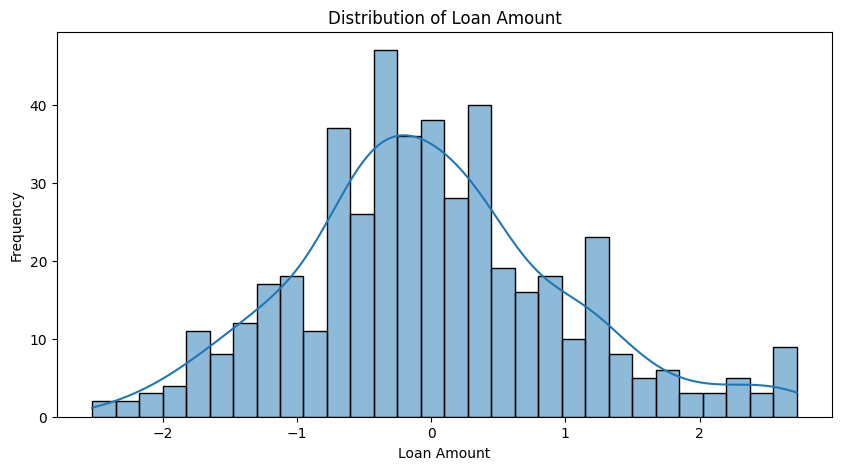

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Loan Amount
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

# Fit a normal distribution
mu, std = stats.norm.fit(df['LoanAmount'])

# Fit a log-normal distribution
shape, loc, scale = stats.lognorm.fit(df['LoanAmount'], floc=0)

# Generate points for the PDF
x = np.linspace(0, df['LoanAmount'].max(), 100)
pdf_normal = stats.norm.pdf(x, mu, std)
pdf_lognormal = stats.lognorm.pdf(x, shape, loc, scale)

# Plotting
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True, stat='density', label='Data', color='lightgray')
plt.plot(x, pdf_normal, 'r-', label='Normal Distribution')
plt.plot(x, pdf_lognormal, 'b-', label='Log-Normal Distribution')
plt.title('Fitted Probability Distributions for Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Compute correlation coefficients
correlation_matrix = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.153615    0.328126
CoapplicantIncome        -0.153615           1.000000    0.157424
LoanAmount                0.328126           0.157424    1.000000


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Loan_Status'])
print(contingency_table)

# Perform Chi-Squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

MACHINE LEARNING MODEL BUILDING


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/Loan Prediction data-1.csv')


# Convert categorical variables to dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Fill missing values for numerical features only
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Define features and target variable
X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

NameError: name 'np' is not defined